<a href="https://colab.research.google.com/github/sagar2582/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

Predicting numerical variable based on some other combinations of variables.

In [1]:
# import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating some data to view and fit


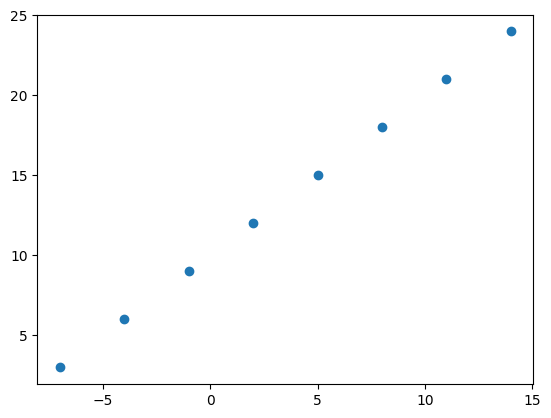

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and output shapes

In [3]:
# Create a demo tensor for our housing peice prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [4]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [5]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

## Steps in modelling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between X & y (features and labels)

In [6]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Squential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd - stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 15.6398 - mae: 15.6398
Epoch 2/5
1/1 [==============================] - 0s 18ms/step - loss: 15.3585 - mae: 15.3585
Epoch 3/5
1/1 [==============================] - 0s 23ms/step - loss: 15.0773 - mae: 15.0773
Epoch 4/5
1/1 [==============================] - 0s 18ms/step - loss: 14.8528 - mae: 14.8528
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 14.7203 - mae: 14.7203


In [7]:
# Check X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [8]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred # 11 points off then where it should be

1/1 [==============================] - 0s 231ms/step


array([[-5.4473186]], dtype=float32)

In [9]:
y_pred + 11

array([[5.5526814]], dtype=float32)

## Improving a Model

we can improve our model by: 
1. **Creting a model** : add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model**: change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model**: fit model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [10]:
# Let's rebuild our model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 748ms/step - loss: 11.8575 - mae: 11.8575
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7250 - mae: 11.7250
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5925 - mae: 11.5925
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.4600 - mae: 11.4600
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3275 - mae: 11.3275
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 11.1950 - mae: 11.1950
Epoch 7/100
1/1 [==============================] - 0s 17ms/step - loss: 11.0625 - mae: 11.0625
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.9300 - mae: 10.9300
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 10.7975 - mae: 10.7975
Epoch 10/100
1/1 [==============================] - 0s 43ms/step - loss: 10.6650 - mae: 10.6650
Epoch 11/100
1/1 [==============================

In [11]:
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [12]:
model.predict([17.0])

1/1 [==============================] - 0s 262ms/step


array([[29.640234]], dtype=float32)

In [13]:
# Let's try to improve the model by adding an extra hidden layer with 100 hidden units.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),     # changes in learning rate were the most important
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 13.2093 - mae: 13.2093
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 13.1450 - mae: 13.1450
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0807 - mae: 13.0807
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0163 - mae: 13.0163
Epoch 5/100
1/1 [==============================] - 0s 20ms/step - loss: 12.9519 - mae: 12.9519
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 12.8875 - mae: 12.8875
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 12.8230 - mae: 12.8230
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 12.7585 - mae: 12.7585
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 12.6940 - mae: 12.6940
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6294 - mae: 12.6294
Epoch 11/100
1/1 [==============================] - 

In [14]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 318ms/step


array([[31.62696]], dtype=float32)

## Evaluating a model
(hyperparameter tuning)

In [16]:
# Visualize while evaluating models for better understanding
# Make a bigger dataset
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [17]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

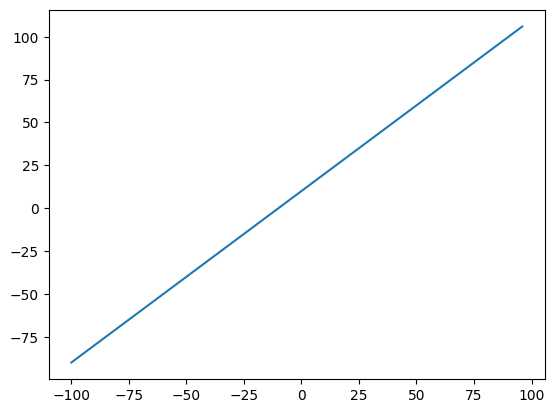

In [18]:
plt.plot(X, y);

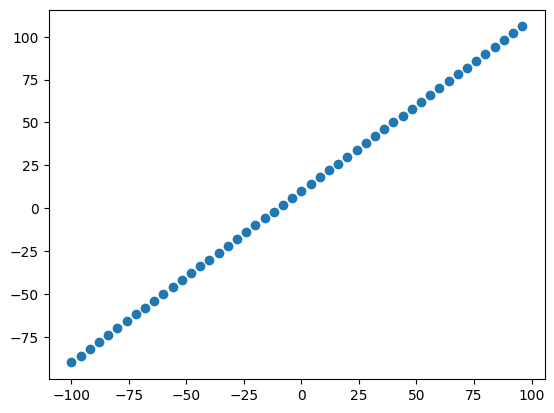

In [19]:
plt.scatter(X, y);

### The 3 sets...

* Training set - 70-80 percent 
* Validation set - 10-15 percent
* Test set - 10-15 percent

In [20]:
# check the lenght of how many samples we have
len(X)

50

In [21]:
# Split the data into train and test sets 
X_train = X[:40] # 1st 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

### Visualizing the data

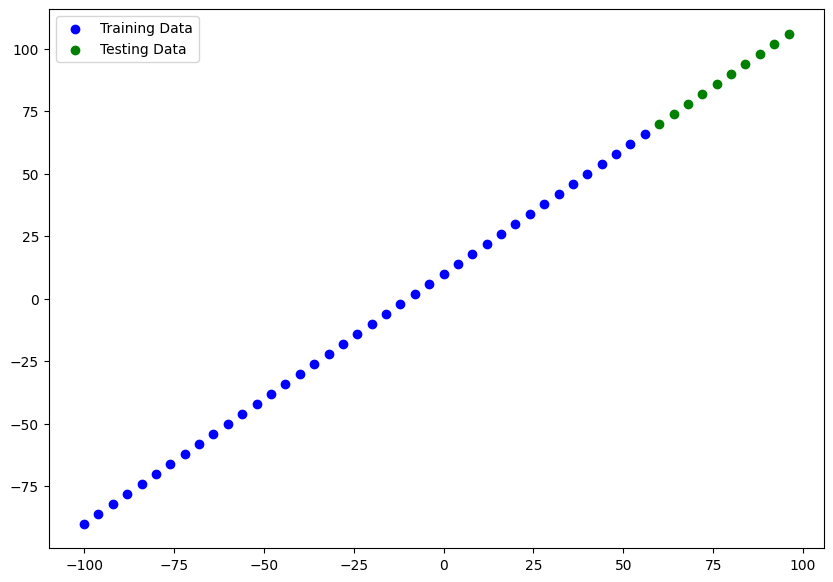

In [22]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train, y_train, c = "b", label = "Training Data")
# Plot the testing data in green
plt.scatter(X_test, y_test, c = "g", label="Testing Data")
# Show a legend
plt.legend();

In [23]:
# Let's build a neural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# model.fit(X_train, y_train, epochs=100)

### Visualizing the model

In [24]:
# model.summary()

In [25]:
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer") # input shape is "1" as we pass one number to get another number through prediction.
], name="sample_model_1")

# 2. Compile a model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])


In [26]:
model.summary()  # Dense ~ Fully Connected Layer

Model: "sample_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameteres the model can updates as it trains
* Non-trainable params - Not updated while training. Brining in already learnt patters or parameters from other models during **Transfer Learning**

### There are **TWO** trainable parameters in every hidden unit.

In [27]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)  # setting verbose to "0" to avoid getting long deep learning outputs

In [28]:
# getting a summary
model.summary()

Model: "sample_model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


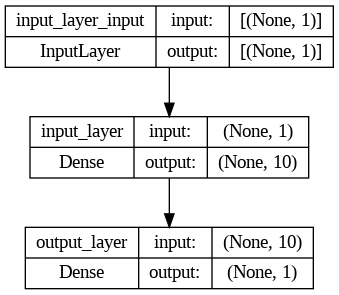

In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### Visualizing our models predictions

To visualize the predictions, plot them against the labels. (Ground truth).

In [30]:
# Make some predictions 
y_pred = model.predict(X_test)
y_pred 

1/1 [==============================] - 0s 142ms/step


array([[ 69.55269 ],
       [ 74.076004],
       [ 78.59932 ],
       [ 83.122635],
       [ 87.64596 ],
       [ 92.16928 ],
       [ 96.6926  ],
       [101.21591 ],
       [105.739235],
       [110.26255 ]], dtype=float32)

In [31]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [32]:
# Let's create a plotting function

def plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred):
  '''
  Plots training data, test data and compare predictions to the ground truth
  '''
  plt.figure(figsize = (10,7))
  # training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # training testing data in green
  plt.scatter(test_data, test_labels, c="g", label = "Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c = "r", label = "Predictions")
  # Show the legend
  plt.legend();



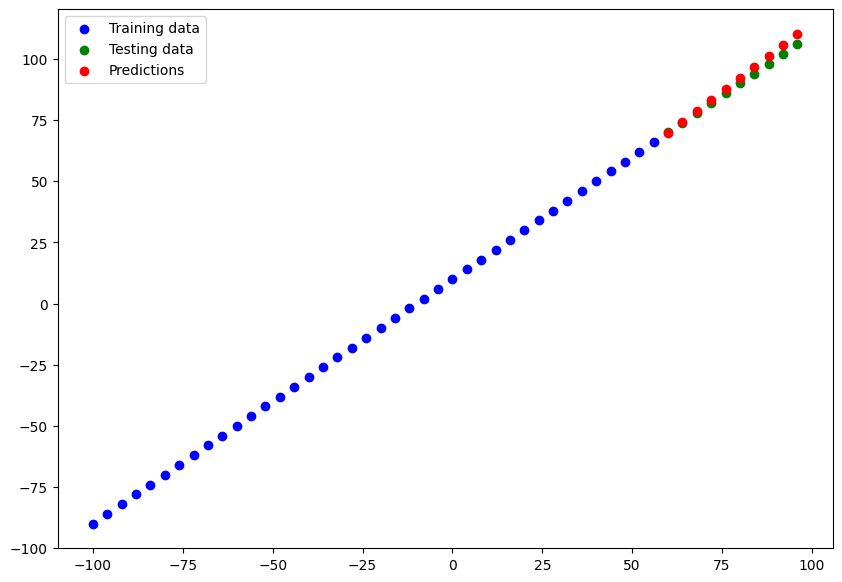

In [33]:
plot_predictions(train_data = X_train, 
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = y_pred)

### Evaluating our model's predcition with regression evaluation metrics

Depending upon the problem there are different Evaluation metrics, In regression we have two main i.e., MAE, MSE and HUBER - combination of MSE and MAE, less sensative to outlier than MSE.

In [34]:
# Evaluate the model on the test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 268ms/step - loss: 1.9971 - mae: 1.9971


[1.9970848560333252, 1.9970848560333252]

In [35]:
y_pred

array([[ 69.55269 ],
       [ 74.076004],
       [ 78.59932 ],
       [ 83.122635],
       [ 87.64596 ],
       [ 92.16928 ],
       [ 96.6926  ],
       [101.21591 ],
       [105.739235],
       [110.26255 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [37]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([18.447311, 14.754397, 12.160273, 10.575473, 10.      , 10.433856,
       11.877039, 14.329547, 17.791388, 22.26255 ], dtype=float32)>

In [38]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 69.55269 ],
       [ 74.076004],
       [ 78.59932 ],
       [ 83.122635],
       [ 87.64596 ],
       [ 92.16928 ],
       [ 96.6926  ],
       [101.21591 ],
       [105.739235],
       [110.26255 ]], dtype=float32)>

In [39]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 69.55269 ,  74.076004,  78.59932 ,  83.122635,  87.64596 ,
        92.16928 ,  96.6926  , 101.21591 , 105.739235, 110.26255 ],
      dtype=float32)>

In [40]:
# Again calulating the MAE after removing the extra layer 
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=1.9970802>

In [41]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=5.8983693>

In [42]:
# Functions for MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model.

In [43]:
 X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

let's do three modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 3 layers, trained for 500 epochs


## Build model_1

In [44]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 2s 33ms/step - loss: 18.8511 - mae: 18.8511
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 8.3295 - mae: 8.3295
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 10.4507 - mae: 10.4507
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 12.9234 - mae: 12.9234
Epoch 5/100
2/2 [==============================] - 0s 44ms/step - loss: 11.9654 - mae: 11.9654
Epoch 6/100
2/2 [==============================] - 0s 44ms/step - loss: 9.2568 - mae: 9.2568
Epoch 7/100
2/2 [==============================] - 0s 50ms/step - loss: 8.4254 - mae: 8.4254
Epoch 8/100
2/2 [==============================] - 0s 49ms/step - loss: 9.0323 - mae: 9.0323
Epoch 9/100
2/2 [==============================] - 0s 58ms/step - loss: 18.3879 - mae: 18.3879
Epoch 10/100
2/2 [==============================] - 0s 36ms/step - loss: 9.9121 - mae: 9.9121
Epoch 11/100
2/2 [==============================] - 0s 28ms

1/1 [==============================] - 0s 48ms/step


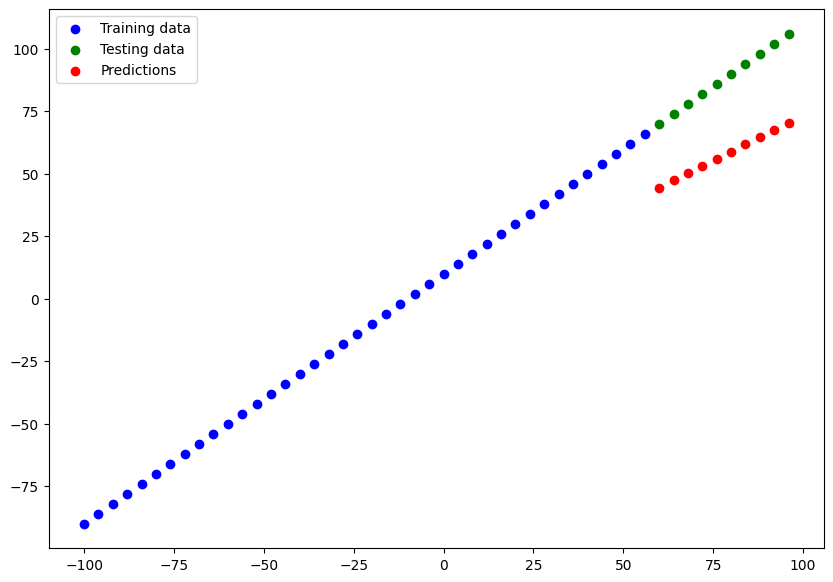

In [45]:
# Make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1);

In [46]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.586924>,
 <tf.Tensor: shape=(), dtype=float32, numpy=945.9513>)

### Model_2
* 2 Dense layers (Fully Connecterd layers) trained for 100 epochs


In [47]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1) 
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])
                
# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 15ms/step - loss: 72.1373 - mse: 7984.0938
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 25.9203 - mse: 1043.5634
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 18.9069 - mse: 523.5765
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 13.7833 - mse: 251.0603
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 15.3327 - mse: 299.3546
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 12.1857 - mse: 183.0167
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.4986 - mse: 161.0713
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.2396 - mse: 176.1622
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 42.0253 - mse: 2818.0869
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 29.2185 - mse: 1207.4707
Epoch 11/100
2/2 [==================

1/1 [==============================] - 0s 57ms/step


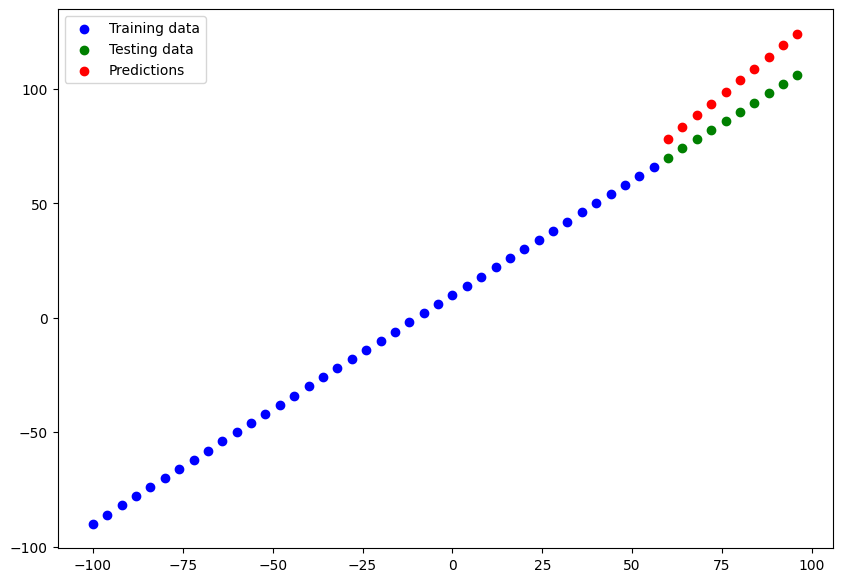

In [48]:
# Make and plot predictions of model_2
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2);

In [49]:
# Calculate the evaluation metrics for model_2
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=13.138577>,
 <tf.Tensor: shape=(), dtype=float32, numpy=182.52953>)

### Model 3
Training two dense layers for 500 epochs

In [50]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 77ms/step


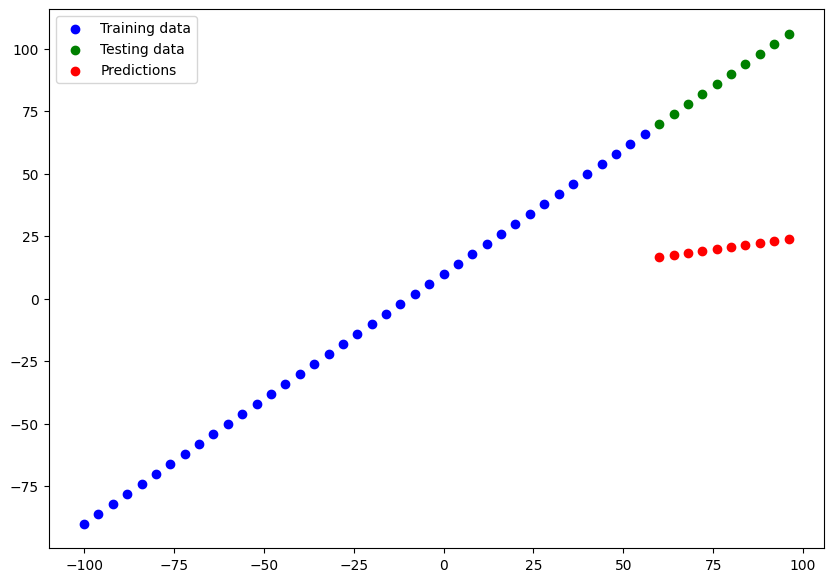

In [51]:
# Make predictions and plot 
y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions=y_pred_3)

In [52]:
# Calculate the metrics
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=67.616844>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4656.096>)

## Comparing the results

In [53]:
# Let's compare our model's result using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.586924,945.951294
1,model_2,13.138577,182.529526
2,model_3,67.616844,4656.096191


In [54]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Saving our models

There are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [55]:
# Let's say we want to save our model_1 using SavedModel format
model_1.save("best_model_SavedModel_format")

In [56]:
# Saving the model in HDF5 (Hierarchical Data Format) format
model_1.save("best_model_HDF5_format.h5")

## Loading out saved models

In [57]:
# Load in the SavedModel foramt model
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [58]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Compare model_1 predictions with SavedModel format model predictions
model_1_preds = model_1.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_1_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 36ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [60]:
model_1_preds, loaded_SavedModel_format_preds

(array([[44.463474],
        [47.341164],
        [50.218853],
        [53.096542],
        [55.97423 ],
        [58.85192 ],
        [61.729614],
        [64.6073  ],
        [67.48499 ],
        [70.362686]], dtype=float32),
 array([[44.463474],
        [47.341164],
        [50.218853],
        [53.096542],
        [55.97423 ],
        [58.85192 ],
        [61.729614],
        [64.6073  ],
        [67.48499 ],
        [70.362686]], dtype=float32))

In [63]:
mae(y_true=y_test, y_pred=model_1_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [65]:
# Loading a h5 model
loaded_h5_model = tf.keras.models.load_model("/content/best_model_HDF5_format.h5")

In [ ]:
# Save a model on google drive
# !cp path_of_model path_of_the_drive_folder

## A Larger Example

In [1]:
# import the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in the insurane dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# One-Hot encoding
ins_one_hot = pd.get_dummies(insurance)

In [4]:
ins_one_hot.head(5)

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values
X = ins_one_hot.drop("charges", axis=1)
